<a href="https://colab.research.google.com/github/LEESUSUSUSU/Dacon/blob/main/Traffic_accident_damage_prediction_final_ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
import geopandas as gpd
import pandas as pd
import os
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [ ]:
! pip install geopandas
! pip install geopy

In [ ]:
# 각 gpkg 파일은 분리되어 있는것 같다. 합쳐주기 위해서 folder path를 받아오자
old_f_path = r'/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/대구 빅데이터 마트 데이터/7. 안전/11. 보행자사고 다발지역'
jaywalk_f_path = r'/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/대구 빅데이터 마트 데이터/7. 안전/5. 보행자무단횡단사고 다발지역'
ice_f_path = r'/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/대구 빅데이터 마트 데이터/7. 안전/8. 결빙사고 다발지역'
truck_f_path = r'/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/대구 빅데이터 마트 데이터/7. 안전/9. 화물차사고 다발지역'
walker_f_path = r'/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/대구 빅데이터 마트 데이터/7. 안전/11. 보행자사고 다발지역'

# 각 folder path 내에서 gpkg 확장자 파일의 이름을 추출해서 list로 만들자
old_fnames = glob.glob(f'{old_f_path}/*.gpkg')
jaywalk_fnames = glob.glob(f'{jaywalk_f_path}/*.gpkg')
ice_fnames = glob.glob(f'{ice_f_path}/*.gpkg')
truck_fnames = glob.glob(f'{truck_f_path}/*.gpkg')
walker_fnames = glob.glob(f'{walker_f_path}/*.gpkg')

# fnames 변수의 list를 만들자
fname_list = [old_fnames, jaywalk_fnames, ice_fnames, truck_fnames, walker_fnames]


In [ ]:
for name in fname_list:
    print(len(name), '|', name)

3 | ['/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/대구 빅데이터 마트 데이터/7. 안전/11. 보행자사고 다발지역/보행자사고 다발지역_100.gpkg', '/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/대구 빅데이터 마트 데이터/7. 안전/11. 보행자사고 다발지역/보행자사고 다발지역_500.gpkg', '/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/대구 빅데이터 마트 데이터/7. 안전/11. 보행자사고 다발지역/보행자사고 다발지역_300.gpkg']
3 | ['/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/대구 빅데이터 마트 데이터/7. 안전/5. 보행자무단횡단사고 다발지역/보행자무단횡단사고 다발지역_100.gpkg', '/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/대구 빅데이터 마트 데이터/7. 안전/5. 보행자무단횡단사고 다발지역/보행자무단횡단사고 다발지역_500.gpkg', '/content/drive/MyDrive/DACON/대구 교통사고 피ᄒ

In [ ]:
# gdf_merge 함수 선언
# 기능 : filenames 경로의 gpkg 파일을 받아서 geopandas 형식의 dataframe으로 read하고 분리된 파일을 병합하는 함수
# input - filenames : mesge하려는 gpkg 파일 경로를 item으로 하는 list
# output - merged_df(병합된 df), gdfs (df의 각각 list ~ 선택)

def gpd_merge(file_names):

    gdfs = []

    # Load each GeoPackage file in the list
    for file_name in file_names:
        try:
            gdf = gpd.read_file(file_name, encoding='cp949')

            gdf = gdf.dropna()

            gdfs.append(gdf)

            print(f"Loaded GeoPackage file: {file_name}")
            print(f"Number of rows after removing missing values: {len(gdf)}")
        except Exception as e:
            print(f"Error loading file {file_name}: {e}")

    # 좌표계 변환 : EPSG:5179 -> EPSG:4326
    merged_gdf = pd.concat(gdfs, axis=0)
    merged_gdf.geometry = merged_gdf.geometry.to_crs('EPSG:4326')

    # geometry 열로부터 위도, 경도 열을 추가함 (multipoligon의 center?)
    merged_gdf['위도'] = merged_gdf['geometry'].apply(lambda geom: geom.centroid.y if geom.geom_type == 'Point' else geom.centroid.y)
    merged_gdf['경도'] = merged_gdf['geometry'].apply(lambda geom: geom.centroid.x if geom.geom_type == 'Point' else geom.centroid.x)

    return merged_gdf

In [ ]:
old_df     = gpd_merge(old_fnames)
jaywalk_df = gpd_merge(jaywalk_fnames)
ice_df     = gpd_merge(ice_fnames)
truck_df   = gpd_merge(truck_fnames)
walker_df  = gpd_merge(walker_fnames)

Loaded GeoPackage file: /content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/대구 빅데이터 마트 데이터/7. 안전/11. 보행자사고 다발지역/보행자사고 다발지역_100.gpkg
Number of rows after removing missing values: 287
Loaded GeoPackage file: /content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/대구 빅데이터 마트 데이터/7. 안전/11. 보행자사고 다발지역/보행자사고 다발지역_500.gpkg
Number of rows after removing missing values: 71
Loaded GeoPackage file: /content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/대구 빅데이터 마트 데이터/7. 안전/11. 보행자사고 다발지역/보행자사고 다발지역_300.gpkg
Number of rows after removing missing values: 94
Loaded GeoPackage file: /content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/대구 빅데이터 마트 데이터/7. 안전/5. 보행자무단횡단사고 다발지역/보행자무단횡단사고 다발지역_100.gpkg
Number of rows after removi

In [ ]:
old_df.head()

,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,geometry,위도,경도
23897,55144,1.0,4.0,4.0,5.0,5.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,"MULTIPOLYGON (((128.48601 35.85309, 128.48712 ...",35.852630,128.486557
23898,55145,1.0,4.0,4.0,5.0,5.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,"MULTIPOLYGON (((128.48600 35.85218, 128.48710 ...",35.851729,128.486546
24189,55602,1.0,4.0,4.0,5.0,5.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,"MULTIPOLYGON (((128.48712 35.85308, 128.48822 ...",35.852621,128.487664
24190,55603,1.0,4.0,4.0,5.0,5.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,"MULTIPOLYGON (((128.48710 35.85218, 128.48821 ...",35.851720,128.487653
25065,56977,1.0,5.0,5.0,7.0,7.0,1.0,1.0,6.0,6.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((128.49043 35.85215, 128.49153 ...",35.851692,128.490975


In [ ]:
old_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

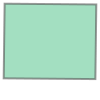

In [ ]:
old_df.iloc[0, -3]

In [ ]:
# 전처리한 파일 저장하기
old_df.to_csv(os.path.join(old_f_path, "/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/보행노인사고.csv"), encoding='cp949', index=False)
jaywalk_df.to_csv(os.path.join(jaywalk_f_path, "/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/무단횡단사고.csv"), encoding='cp949', index=False)
ice_df.to_csv(os.path.join(ice_f_path, "/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/결빙사고.csv"), encoding='cp949', index=False)
truck_df.to_csv(os.path.join(truck_f_path, "/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/화물차사고.csv"), encoding='cp949', index=False)
walker_df.to_csv(os.path.join(walker_f_path, "/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/보행자사고.csv"), encoding='cp949', index=False)

In [ ]:
# 불러오기
old_df = pd.read_csv(os.path.join(old_f_path, "/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/보행노인사고.csv"), encoding='cp949')
jaywalk_df = pd.read_csv(os.path.join(jaywalk_f_path, "/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/무단횡단사고.csv"), encoding='cp949')
ice_df = pd.read_csv(os.path.join(ice_f_path, "/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/결빙사고.csv"), encoding='cp949')
truck_df = pd.read_csv(os.path.join(truck_f_path, "/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/화물차사고.csv"), encoding='cp949')
walker_df = pd.read_csv(os.path.join(walker_f_path, "/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/보행자사고.csv"), encoding='cp949')

In [ ]:
gdf_list = [old_df, jaywalk_df, ice_df, truck_df, walker_df]
# 열이름이 동일하다 (다발지역내 사고 / 사상자 / 사망자 / 중상자 / 경상자 / 부상자 / 경상자 / 부상신고자수 합계 및 평균을 의미), TAAS API의 설명 참조
# occrrnc_cnt : 사고건수 / caslt_cnt : 사상자수 / dth_dnv_cnt : 사망자수 / se_dnv_cnt : 중상자수 / sl_dnv_cnt : 경상자수 / wnd_dnv_cnt : 부상신고자수
#

for gdf in gdf_list:
    print(len(gdf), gdf.columns.to_list())

452 ['id', 'count', 'occrrnc_cnt_sum', 'occrrnc_cnt_mean', 'caslt_cnt_sum', 'caslt_cnt_mean', 'dth_dnv_cnt_sum', 'dth_dnv_cnt_mean', 'se_dnv_cnt_sum', 'se_dnv_cnt_mean', 'sl_dnv_cnt_sum', 'sl_dnv_cnt_mean', 'wnd_dnv_cnt_sum', 'wnd_dnv_cnt_mean', 'geometry', '위도', '경도']
509 ['id', 'count', 'occrrnc_cnt_sum', 'occrrnc_cnt_mean', 'caslt_cnt_sum', 'caslt_cnt_mean', 'dth_dnv_cnt_sum', 'dth_dnv_cnt_mean', 'se_dnv_cnt_sum', 'se_dnv_cnt_mean', 'sl_dnv_cnt_sum', 'sl_dnv_cnt_mean', 'wnd_dnv_cnt_sum', 'wnd_dnv_cnt_mean', 'geometry', '위도', '경도']
44 ['id', 'count', 'occrrnc_cnt_sum', 'occrrnc_cnt_mean', 'caslt_cnt_sum', 'caslt_cnt_mean', 'dth_dnv_cnt_sum', 'dth_dnv_cnt_mean', 'se_dnv_cnt_sum', 'se_dnv_cnt_mean', 'sl_dnv_cnt_sum', 'sl_dnv_cnt_mean', 'wnd_dnv_cnt_sum', 'wnd_dnv_cnt_mean', 'geometry', '위도', '경도']
315 ['id', 'count', 'occrrnc_cnt_sum', 'occrrnc_cnt_mean', 'caslt_cnt_sum', 'caslt_cnt_mean', 'dth_dnv_cnt_sum', 'dth_dnv_cnt_mean', 'se_dnv_cnt_sum', 'se_dnv_cnt_mean', 'sl_dnv_cnt_sum', 'sl

In [ ]:
old_df.head()

,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,geometry,위도,경도
0,55144,1.0,4.0,4.0,5.0,5.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,MULTIPOLYGON (((128.48600864791877 35.85308563...,35.852630,128.486557
1,55145,1.0,4.0,4.0,5.0,5.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,MULTIPOLYGON (((128.48599748577126 35.85218415...,35.851729,128.486546
2,55602,1.0,4.0,4.0,5.0,5.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,MULTIPOLYGON (((128.48711597047537 35.85307654...,35.852621,128.487664
3,55603,1.0,4.0,4.0,5.0,5.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,MULTIPOLYGON (((128.4871047957973 35.852175059...,35.851720,128.487653
4,56977,1.0,5.0,5.0,7.0,7.0,1.0,1.0,6.0,6.0,0.0,0.0,0.0,0.0,MULTIPOLYGON (((128.4904267228955 35.852147721...,35.851692,128.490975


In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/test.csv")
print(train_df.shape, test_df.shape)

(39609, 23) (10963, 8)


In [ ]:
# TRAIN, TEST 데이터 전처리 함수
def convert_df(df):
# 1. 사고일시, 요일 열 전처리 하는 함수

    # 사고일시를 datetime 형태로 변환
    df['사고일시'] = pd.to_datetime(df['사고일시'])

    # 사고일시로부터 연/월/일/시 열 생성
    df['year'] = df['사고일시'].dt.year
    df['month'] = df['사고일시'].dt.month
    df['day'] = df['사고일시'].dt.day
    df['hour'] = df['사고일시'].dt.hour

    # '사고일시' 로부터 요일 category형으로 label encoding
    df['요일'] = df['사고일시'].dt.day_of_week.astype('category')
    # 요일에서 '월'만 남기기
    # df['요일'] = df['요일'].str.replace('요일','')

# 2. 시군구 -> 시/군/구 구분
    df['시'] = df['시군구'].str.split(' ').str.get(0)
    df['군'] = df['시군구'].str.split(' ').str.get(1)
    df['구'] = df['시군구'].str.split(' ').str.get(2)

# 3. 도로형태 -> 도로형태_대 / 도로형태_중 으로 구분
    df['도로형태_대'] = df['도로형태'].str.split(' - ').str.get(0)
    df['도로형태_중'] = df['도로형태'].str.split(' - ').str.get(1)

    return df

In [ ]:
train_df = convert_df(train_df)
test_df = convert_df(test_df)

# train_df 기준으로 인코딩 할것? unique 값의 list를 만들자
gu_list = train_df['구'].unique().tolist()
print(gu_list)

['대신동', '감삼동', '두산동', '복현동', '신암동', '지산동', '상인동', '태전동', '지묘동', '평리동', '신기동', '상리동', '월성동', '황금동', '구암동', '신천동', '만촌동', '남산동', '비산동', '침산동', '두류동', '신매동', '대곡동', '유가읍', '논공읍', '율하동', '시지동', '봉무동', '다사읍', '동산동', '이현동', '이천동', '수성동4가', '노원동3가', '서변동', '관음동', '학정동', '파동', '상동', '이곡동', '효목동', '읍내동', '남성로', '죽전동', '대명동', '동천동', '지저동', '사수동', '덕산동', '본리동', '용계동', '범어동', '신당동', '성당동', '용산동', '태평로3가', '도학동', '욱수동', '불로동', '칠성동1가', '장기동', '매호동', '대천동', '삼덕동1가', '수성동2가', '팔달동', '삼덕동', '진천동', '수성동3가', '가창면', '방촌동', '산격동', '월암동', '현풍읍', '구지면', '매천동', '송현동', '고성동3가', '봉덕동', '칠성동2가', '공평동', '봉산동', '괴전동', '국우동', '대현동', '노원동1가', '대봉동', '본동', '신서동', '검단동', '화원읍', '동호동', '삼덕동2가', '입석동', '중동', '삼덕동3가', '파호동', '동내동', '하빈면', '율암동', '동인동1가', '내당동', '유천동', '호산동', '교동', '옥포읍', '원대동3가', '검사동', '동인동4가', '수성동1가', '고성동2가', '각산동', '중리동', '고성동1가', '갈산동', '대림동', '호림동', '연호동', '동변동', '범물동', '계산동2가', '동문동', '고모동', '금호동', '장동', '도원동', '수창동', '동인동2가', '가천동', '노변동', '달성동', '동인동3가', '서문로2가', '동성로2가', '중대동', '사월동', '장관동', 

In [ ]:
seculight_df = pd.read_csv("/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/대구 보안등 정보.csv", encoding= 'cp949')
child_df = pd.read_csv("/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/대구 어린이 보호 구역 정보.csv", encoding= 'cp949')
parking_df = pd.read_csv("/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/대구 주차장 정보.csv", encoding= 'cp949')
cctv_df = pd.read_csv("/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/대구 CCTV 정보.csv", encoding= 'cp949')
df_dict = {'보안등':seculight_df, '어린이보호구역':child_df, '주차장':parking_df, 'cctv':cctv_df}


In [ ]:
# df와 unique list(A:구)를 입력해서 '구' 값을 추출해서 열을 새로 만드는 전처리 함수
def preprocess_df(df, A):
    # 1) Create a new column '구' to store the values
    df['구'] = np.nan

    # 2) Iterate through each row in the data frame
    for index, row in df.iterrows():
        # Check if the value in '소재지지번주소' is not NaN
        if not pd.isna(row['소재지지번주소']):
            # Check if any value in A is present in the '소재지지번주소' column
            for value in A:
                if value in row['소재지지번주소']:
                    # If found, store the value in column '구'
                    df.at[index, '구'] = value
                    break  # Break the loop if a match is found

    return df


In [ ]:
for key, df in df_dict.items():
    print(key, '|열 개수:',  len(df.columns), '|열 이름:', df.columns.tolist())

보안등 |열 개수: 8 |열 이름: ['보안등위치명', '설치개수', '소재지도로명주소', '소재지지번주소', '위도', '경도', '설치연도', '설치형태']
어린이보호구역 |열 개수: 12 |열 이름: ['시설종류', '대상시설명', '소재지도로명주소', '소재지지번주소', '위도', '경도', '관리기관명', '관할경찰서명', 'CCTV설치여부', 'CCTV설치대수', '보호구역도로폭', '데이터기준일자']
주차장 |열 개수: 29 |열 이름: ['주차장관리번호', '주차장명', '주차장구분', '주차장유형', '소재지도로명주소', '소재지지번주소', '주차구획수', '급지구분', '부제시행구분', '운영요일', '평일운영시작시각', '평일운영종료시각', '토요일운영시작시각', '토요일운영종료시각', '공휴일운영시작시각', '공휴일운영종료시각', '요금정보', '주차기본시간', '주차기본요금', '추가단위시간', '추가단위요금', '1일주차권요금적용시간', '1일주차권요금', '월정기권요금', '결제방법', '특기사항', '위도', '경도', '데이터기준일자']
cctv |열 개수: 18 |열 이름: ['무인교통단속카메라관리번호', '시도명', '시군구명', '도로종류', '도로노선번호', '도로노선명', '도로노선방향', '소재지도로명주소', '소재지지번주소', '위도', '경도', '설치장소', '단속구분', '제한속도', '단속구간위치구분', '과속단속구간길이', '보호구역구분', '설치연도']


In [ ]:
for key, df in df_dict.items():
     df = preprocess_df(df, gu_list)

In [ ]:
for key, df in df_dict.items():
    print(key, '|열 개수:',  len(df.columns), '|열 이름:', df.columns.tolist())

보안등 |열 개수: 9 |열 이름: ['보안등위치명', '설치개수', '소재지도로명주소', '소재지지번주소', '위도', '경도', '설치연도', '설치형태', '구']
어린이보호구역 |열 개수: 13 |열 이름: ['시설종류', '대상시설명', '소재지도로명주소', '소재지지번주소', '위도', '경도', '관리기관명', '관할경찰서명', 'CCTV설치여부', 'CCTV설치대수', '보호구역도로폭', '데이터기준일자', '구']
주차장 |열 개수: 30 |열 이름: ['주차장관리번호', '주차장명', '주차장구분', '주차장유형', '소재지도로명주소', '소재지지번주소', '주차구획수', '급지구분', '부제시행구분', '운영요일', '평일운영시작시각', '평일운영종료시각', '토요일운영시작시각', '토요일운영종료시각', '공휴일운영시작시각', '공휴일운영종료시각', '요금정보', '주차기본시간', '주차기본요금', '추가단위시간', '추가단위요금', '1일주차권요금적용시간', '1일주차권요금', '월정기권요금', '결제방법', '특기사항', '위도', '경도', '데이터기준일자', '구']
cctv |열 개수: 19 |열 이름: ['무인교통단속카메라관리번호', '시도명', '시군구명', '도로종류', '도로노선번호', '도로노선명', '도로노선방향', '소재지도로명주소', '소재지지번주소', '위도', '경도', '설치장소', '단속구분', '제한속도', '단속구간위치구분', '과속단속구간길이', '보호구역구분', '설치연도', '구']


In [ ]:
# 저장하기
seculight_df.to_csv("/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/new/대구 보안등 정보_구추가.csv", encoding= 'cp949', index=False)
child_df.to_csv("/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/new/대구 어린이 보호 구역 정보_구추가.csv", encoding= 'cp949', index=False)
parking_df.to_csv("/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/new/대구 주차장 정보_구추가.csv", encoding= 'cp949', index=False)
cctv_df.to_csv("/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/new/대구 CCTV 정보_구추가.csv", encoding= 'cp949', index=False)

In [ ]:
# 불러오기
seculight_df = pd.read_csv("/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/new/대구 보안등 정보_구추가.csv", encoding= 'cp949')
child_df = pd.read_csv("/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/new/대구 어린이 보호 구역 정보_구추가.csv", encoding= 'cp949')
parking_df = pd.read_csv("/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/new/대구 주차장 정보_구추가.csv", encoding= 'cp949')
cctv_df = pd.read_csv("/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/new/대구 CCTV 정보_구추가.csv", encoding= 'cp949')

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib의 폰트를 Nanum 폰트로 설정
plt.rc('font', family='NanumBarunGothic')




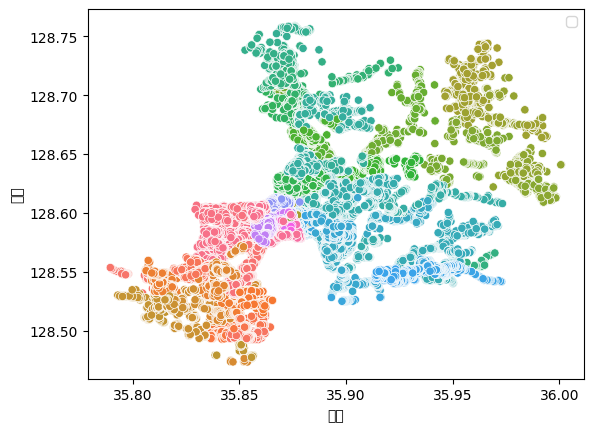

In [ ]:
# 위도, 경도에 따른 구의 분포를 확인해보자
sns.scatterplot(x='위도', y='경도', hue='구', data=seculight_df)
plt.legend("")

In [ ]:
# gu_model을 만들 df를 합쳐주자
gu_df = pd.concat(df_dict.values(), axis=0)[['위도', '경도', '구']]

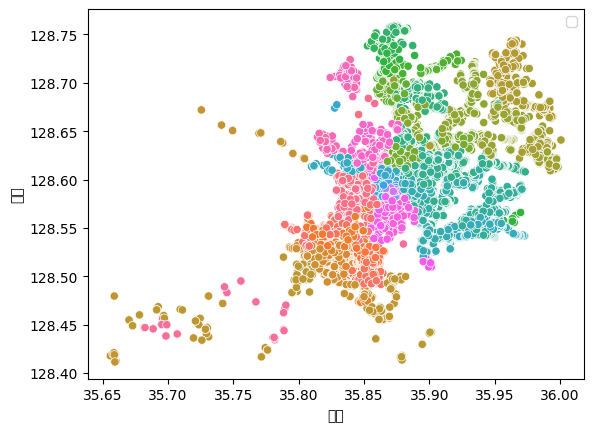

In [ ]:
# 위도, 경도에 따른 구의 분포를 확인해보자
sns.scatterplot(x='위도', y='경도', hue='구', data=gu_df)
plt.legend("")

In [ ]:
# 일단 단순한 RF모델/KNN 사용해보자 :

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


gu_df = gu_df.dropna()
X = gu_df[['위도', '경도']]
y = gu_df['구']
print(len(X), len(y))

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors

classifiers = [rf_classifier, knn_classifier]
classifier_names = ['Random Forest', 'k-Nearest Neighbors (KNN)']

for clf, clf_name in zip(classifiers, classifier_names):
    # Perform k-fold cross-validation and calculate accuracy
    accuracy_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

    # Print results
    print(f'{clf_name} Model:')
    print(f'Accuracy Scores: {accuracy_scores}')
    print(f'Mean Accuracy: {accuracy_scores.mean():.2%}\n')

44070 44070
Random Forest Model:
Accuracy Scores: [0.97696846 0.97821647 0.97798956 0.97708192 0.9748128 ]
Mean Accuracy: 97.70%

k-Nearest Neighbors (KNN) Model:
Accuracy Scores: [0.97628772 0.97492625 0.97515317 0.97424552 0.97390515]
Mean Accuracy: 97.49%



In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X, y)

RandomForestClassifier(random_state=42)

In [ ]:
# 저장 및 불러오기
from joblib import dump, load
model_filename = '/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/open/open/external_open/new/gu_model_RF.joblib'
dump(rf_classifier, model_filename)

gu_model = load(model_filename)

In [ ]:
# gu model로 gpd에서 '구'를 예측하자
for gdf in gdf_list:
    if '위도' in gdf.columns and '경도' in gdf.columns:
        gdf['구'] = gu_model.predict(gdf[['위도', '경도']])

    # 사용안할 열을 drop
    cols_remove = ['geometry', 'occrrnc_cnt_mean', 'caslt_cnt_mean', 'dth_dnv_cnt_mean', 'se_dnv_cnt_mean', 'sl_dnv_cnt_mean', 'wnd_dnv_cnt_mean', '위도', '경도', 'id']

    if all(column in gdf.columns for column in cols_remove):
        gdf.drop(cols_remove, axis=1, inplace=True)
    # gdf.reset_index(drop=True, inplace=True)

In [ ]:
old_df.head()

,count,occrrnc_cnt_sum,caslt_cnt_sum,dth_dnv_cnt_sum,se_dnv_cnt_sum,sl_dnv_cnt_sum,wnd_dnv_cnt_sum,구
0,1.0,4.0,5.0,0.0,4.0,1.0,0.0,호산동
1,1.0,4.0,5.0,0.0,4.0,1.0,0.0,호산동
2,1.0,4.0,5.0,0.0,4.0,1.0,0.0,신당동
3,1.0,4.0,5.0,0.0,4.0,1.0,0.0,호산동
4,1.0,5.0,7.0,1.0,6.0,0.0,0.0,신당동


In [ ]:
# 각 df로부터 구 기준으로 집계된 새로운 df들을 만들자 (agg_dfs에 저장)
def create_agg_df(dataframes):

    aggregated_dfs = []

    for df in dataframes:
        # Perform groupby operation and aggregate based on the specified column
        aggregated_df = df.groupby('구').sum().reset_index()
        aggregated_dfs.append(aggregated_df)

    return aggregated_dfs

# Example: Create aggregated data frames based on the 'old' column
agg_dfs = create_agg_df(gdf_list)


In [ ]:
agg_dfs[-1].head()

,구,count,occrrnc_cnt_sum,caslt_cnt_sum,dth_dnv_cnt_sum,se_dnv_cnt_sum,sl_dnv_cnt_sum,wnd_dnv_cnt_sum
0,감삼동,15.0,72.0,96.0,3.0,72.0,21.0,0.0
1,공평동,1.0,4.0,6.0,0.0,4.0,2.0,0.0
2,교동,4.0,16.0,24.0,0.0,16.0,8.0,0.0
3,구암동,1.0,4.0,4.0,0.0,4.0,0.0,0.0
4,남산동,9.0,36.0,69.0,0.0,36.0,28.0,5.0


In [ ]:
# train 데이터와 합쳐주기 위해서 각 집계된 리스트의 열이름을 구별해서 합쳐주자
string_list = ['old', 'jay', 'ice', 'truck', 'walker']

# Iterate over each data frame in the list and modify column names
for i, (agg_df, prefix) in enumerate(zip(agg_dfs, string_list)):
    if prefix != '구':
        # Modify column names based on the rules
        new_column_names = [prefix + '_' + col if col != '구' else col for col in agg_df.columns]
        agg_df.columns = new_column_names


In [ ]:
for df in agg_dfs:
    print(df.columns.to_list() )
    # print(len(df), len(df['구'].unique()))

['구', 'old_count', 'old_occrrnc_cnt_sum', 'old_caslt_cnt_sum', 'old_dth_dnv_cnt_sum', 'old_se_dnv_cnt_sum', 'old_sl_dnv_cnt_sum', 'old_wnd_dnv_cnt_sum']
['구', 'jay_count', 'jay_occrrnc_cnt_sum', 'jay_caslt_cnt_sum', 'jay_dth_dnv_cnt_sum', 'jay_se_dnv_cnt_sum', 'jay_sl_dnv_cnt_sum', 'jay_wnd_dnv_cnt_sum']
['구', 'ice_count', 'ice_occrrnc_cnt_sum', 'ice_caslt_cnt_sum', 'ice_dth_dnv_cnt_sum', 'ice_se_dnv_cnt_sum', 'ice_sl_dnv_cnt_sum', 'ice_wnd_dnv_cnt_sum']
['구', 'truck_count', 'truck_occrrnc_cnt_sum', 'truck_caslt_cnt_sum', 'truck_dth_dnv_cnt_sum', 'truck_se_dnv_cnt_sum', 'truck_sl_dnv_cnt_sum', 'truck_wnd_dnv_cnt_sum']
['구', 'walker_count', 'walker_occrrnc_cnt_sum', 'walker_caslt_cnt_sum', 'walker_dth_dnv_cnt_sum', 'walker_se_dnv_cnt_sum', 'walker_sl_dnv_cnt_sum', 'walker_wnd_dnv_cnt_sum']


In [ ]:
# '구'를 기준으로 merge 하자

from functools import reduce

agg_merged_df = reduce(lambda left, right: pd.merge(left, right, on='구', how='outer'), agg_dfs)
agg_merged_df = agg_merged_df.fillna(0)
print(agg_merged_df.shape, agg_merged_df.columns.to_list())

(89, 36) ['구', 'old_count', 'old_occrrnc_cnt_sum', 'old_caslt_cnt_sum', 'old_dth_dnv_cnt_sum', 'old_se_dnv_cnt_sum', 'old_sl_dnv_cnt_sum', 'old_wnd_dnv_cnt_sum', 'jay_count', 'jay_occrrnc_cnt_sum', 'jay_caslt_cnt_sum', 'jay_dth_dnv_cnt_sum', 'jay_se_dnv_cnt_sum', 'jay_sl_dnv_cnt_sum', 'jay_wnd_dnv_cnt_sum', 'ice_count', 'ice_occrrnc_cnt_sum', 'ice_caslt_cnt_sum', 'ice_dth_dnv_cnt_sum', 'ice_se_dnv_cnt_sum', 'ice_sl_dnv_cnt_sum', 'ice_wnd_dnv_cnt_sum', 'truck_count', 'truck_occrrnc_cnt_sum', 'truck_caslt_cnt_sum', 'truck_dth_dnv_cnt_sum', 'truck_se_dnv_cnt_sum', 'truck_sl_dnv_cnt_sum', 'truck_wnd_dnv_cnt_sum', 'walker_count', 'walker_occrrnc_cnt_sum', 'walker_caslt_cnt_sum', 'walker_dth_dnv_cnt_sum', 'walker_se_dnv_cnt_sum', 'walker_sl_dnv_cnt_sum', 'walker_wnd_dnv_cnt_sum']


In [ ]:
train_df = pd.merge(train_df, agg_merged_df, on='구', how='left').fillna(0)
test_df = pd.merge(test_df, agg_merged_df, on='구', how='left').fillna(0)
print(train_df.shape, test_df.shape)

(39609, 67) (10963, 52)


In [ ]:
test_df.columns

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', 'year',
       'month', 'day', 'hour', '시', '군', '구', '도로형태_대', '도로형태_중', 'old_count',
       'old_occrrnc_cnt_sum', 'old_caslt_cnt_sum', 'old_dth_dnv_cnt_sum',
       'old_se_dnv_cnt_sum', 'old_sl_dnv_cnt_sum', 'old_wnd_dnv_cnt_sum',
       'jay_count', 'jay_occrrnc_cnt_sum', 'jay_caslt_cnt_sum',
       'jay_dth_dnv_cnt_sum', 'jay_se_dnv_cnt_sum', 'jay_sl_dnv_cnt_sum',
       'jay_wnd_dnv_cnt_sum', 'ice_count', 'ice_occrrnc_cnt_sum',
       'ice_caslt_cnt_sum', 'ice_dth_dnv_cnt_sum', 'ice_se_dnv_cnt_sum',
       'ice_sl_dnv_cnt_sum', 'ice_wnd_dnv_cnt_sum', 'truck_count',
       'truck_occrrnc_cnt_sum', 'truck_caslt_cnt_sum', 'truck_dth_dnv_cnt_sum',
       'truck_se_dnv_cnt_sum', 'truck_sl_dnv_cnt_sum', 'truck_wnd_dnv_cnt_sum',
       'walker_count', 'walker_occrrnc_cnt_sum', 'walker_caslt_cnt_sum',
       'walker_dth_dnv_cnt_sum', 'walker_se_dnv_cnt_sum',
       'walker_sl_dnv_cnt_sum', 'walker_wnd_dnv_cnt_sum'],
     

In [ ]:
agg_sec_df = seculight_df[['구', '설치개수']].groupby(['구']).sum().reset_index()
agg_sec_df.columns = ['구', '보안등_수']
agg_sec_df.head()

,구,보안등_수
0,가창면,1123
1,각산동,139
2,갈산동,351
3,감삼동,941
4,검단동,391


In [ ]:
child_df['count'] = 1
agg_child_df = child_df[['구', 'CCTV설치대수', 'count']].groupby('구').sum().reset_index()
agg_child_df.columns = ['구', '어린이_CCTV_설치대수', '어린이구역_수']
agg_child_df.head()

,구,어린이_CCTV_설치대수,어린이구역_수
0,가창면,0.0,8
1,검단동,4.0,1
2,고성동1가,2.0,1
3,고성동2가,2.0,1
4,관음동,22.0,5


In [ ]:
agg_csv_dfs = [agg_sec_df, agg_child_df]

agg_csv_df = reduce(lambda left, right: pd.merge(left, right, on='구', how='outer'), agg_csv_dfs)
agg_csv_df = agg_csv_df.fillna(0)
print(agg_csv_df.shape, len(agg_csv_df['구'].unique()), agg_csv_df.columns.to_list())

(181, 4) 181 ['구', '보안등_수', '어린이_CCTV_설치대수', '어린이구역_수']


In [ ]:
train_df = pd.merge(train_df, agg_csv_df, on='구', how='left').fillna(0)
test_df = pd.merge(test_df, agg_csv_df, on='구', how='left').fillna(0)
# print(train_df.shape, test_df.shape)

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from math import sqrt
from lightgbm import LGBMRegressor



# Date processing and encoding
train_df['사고일시'] = pd.to_datetime(train_df['사고일시'])
train_df['년'] = train_df['사고일시'].dt.year
train_df['월'] = train_df['사고일시'].dt.month
train_df['일'] = train_df['사고일시'].dt.day
train_df['시간'] = train_df['사고일시'].dt.hour

test_df['사고일시'] = pd.to_datetime(test_df['사고일시'])
test_df['년'] = test_df['사고일시'].dt.year
test_df['월'] = test_df['사고일시'].dt.month
test_df['일'] = test_df['사고일시'].dt.day
test_df['시간'] = test_df['사고일시'].dt.hour

train_encoded = pd.get_dummies(train_df.drop(['사고일시', 'ID', 'ECLO'], axis=1))
test_encoded = pd.get_dummies(test_df.drop(['사고일시', 'ID'], axis=1))
final_train, final_test = train_encoded.align(test_encoded, join='inner', axis=1)

X_train = final_train
y_train = train_df['ECLO']




In [ ]:
# RandomForest and GradientBoosting models
rf_models = [RandomForestRegressor(n_estimators=100 + i*10 ).fit(X_train, y_train) for i in range(5)]
gb_models = [GradientBoostingRegressor(n_estimators=100 + i*10).fit(X_train, y_train) for i in range(2)]

rf_predictions_list = [model.predict(final_test) for model in rf_models]
gb_predictions_list = [model.predict(final_test) for model in gb_models]

rf_mean_predictions = np.mean(rf_predictions_list, axis=0)
gb_mean_predictions = np.mean(gb_predictions_list, axis=0)

In [ ]:
# XGBoost models
xgb_models = []
xgb_predictions_list = []


for i in range(150):
    model = xgb.XGBRegressor(objective='reg:squarederror',
                             n_estimators=50 + 50 * i,
                             max_depth=5,
                             learning_rate=0.1,
                             alpha=10 ,
                             n_jobs=-1 ,
                             gamma =0.01 ,
                             subsample= 0.75,
                             colsample_bytree=0.3,
                             reg_lambda=10)
    model.fit(X_train, y_train)
    xgb_models.append(model)
    predictions = model.predict(final_test)
    xgb_predictions_list.append(predictions)

xgb_mean_predictions = np.mean(xgb_predictions_list, axis=0)


KeyboardInterrupt: ignored

In [ ]:
print(xgb_mean_predictions)

[4.740345  3.9236908 6.212136  ... 5.581085  6.2923307 5.466489 ]


In [ ]:
# SVM Model
svm_model = SVR().fit(X_train, y_train)
svm_predictions = svm_model.predict(final_test)

In [ ]:
# LightGBM Model
lgbm_models = [LGBMRegressor(n_estimators=100 + i*10).fit(X_train, y_train) for i in range(3)]
lgbm_predictions_list = [model.predict(final_test) for model in lgbm_models]
lgbm_mean_predictions = np.mean(lgbm_predictions_list, axis=0)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1823
[LightGBM] [Info] Number of data points in the train set: 39609, number of used features: 386
[LightGBM] [Info] Start training from score 4.726704
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1823
[LightGBM] [Info] Number of data points in the train set: 39609, number of used features: 386
[LightGBM] [Info] Start training from score 4.726704
[LightGBM] [Warning] Found

In [ ]:
# from catboost import CatBoostRegressor

# # CatBoost Model
# cb_models = [CatBoostRegressor(iterations=100 + i*10, silent=True).fit(X_train, y_train) for i in range(3)]
# cb_predictions_list = [model.predict(final_test) for model in cb_models]
# cb_mean_predictions = np.mean(cb_predictions_list, axis=0)


ModuleNotFoundError: ignored

In [ ]:

ensemble_predictions = (rf_mean_predictions + gb_mean_predictions + xgb_mean_predictions + svm_predictions  ) /4
ensemble_predictions = np.where(ensemble_predictions < 0, 0, ensemble_predictions)

# Create submission file
submission = pd.DataFrame({'ID': test_df['ID'], 'ECLO': ensemble_predictions})
submission.to_csv('/content/drive/MyDrive/DACON/대구 교통사고 피해 예측AI/예측/12_02.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'ensemble_predictions' is your predictions array
plt.hist(ensemble_predictions, bins=20, edgecolor='black')
plt.title('Distribution of Ensemble Predictions')
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.show()

# Assuming you have a 'y_test' array with actual values
plt.scatter(y_test, ensemble_predictions)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3) # Diagonal line
plt.show()



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have a 'y_test' array with the actual values
# Replace 'ensemble_predictions' with your model's predictions on the test set
mse = mean_squared_error(y_test, ensemble_predictions)
r2 = r2_score(y_test, ensemble_predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


ValueError: ignored

In [ ]:
# 1) 대구 데이터만 사용 (시, 군 drop)
features = ['month', 'day', 'hour', '요일', '기상상태', '구',  '도로형태_대', '도로형태_중',  '노면상태', '사고유형', 'old_count',
       'jay_count', 'ice_count',  'truck_count', 'walker_count',
       '보안등_수', '어린이_CCTV_설치대수', '어린이구역_수']
labels = ['ECLO']

# feature selection 재선택
X = train_df[features]
X_test = test_df[features]

y = train_df[labels]

print(X.shape, X_test.shape)

(39609, 18) (10963, 18)


In [ ]:
pip install -U scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 71.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the dataset into an optimized data structure called Dmatrix that XGBoost supports
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test)

# Set the parameters for XGBoost
params = {
    'max_depth': 6,
    'eta': 0.3,
    'objective': 'multi:softmax',  # Change this to 'reg:squarederror' for regression problems
    'num_class': 3  # Update this to the number of classes in your label
}

# Specify the number of training iterations
num_round = 50

# Train the model
bst = xgb.train(params, dtrain, num_round)

# Predictions on validation set
preds = bst.predict(dval)
print("Validation Accuracy:", accuracy_score(y_val, preds))
print("Classification Report:\n", classification_report(y_val, preds))

# Predictions on test set
test_preds = bst.predict(dtest)

# If you want to save predictions
np.savetxt("test_predictions.csv", test_preds, delimiter=",")


ValueError: ignored